# Self-Avoiding Paths on Cube (x <---> y)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from itertools import combinations

### Initializing all self-avoiding paths on the cube

In [2]:
# the edges of the cube
cube_edges = ['xb','xe','xf','ab','ay','af','cb','cy','ce','dy','de','df']

In [3]:
# all self-avoiding paths of length 3
a1 = ['x','b','a','y']; a2 = ['x','b','c','y']; a3 = ['x','f','a','y']; a4 = ['x','f','d','y']; 
a5 = ['x','e','c','y']; a6 = ['x','e','d','y']

In [4]:
# all self-avoiding paths of length 5
a7 = ['x','b','a','f','d','y']; a8 = ['x','b','c','e','d','y']; a9 = ['x','e','c','b','a','y'];
a10 = ['x','f','a','b','c','y']; a11 = ['x','f','d','e','c','y']; a12 = ['x','e','d','f','a','y']

In [5]:
# all self-avoiding paths of length 7
a13 = ['x','b','a','f','d','e','c','y']; a14 = ['x','e','d','f','a','b','c','y']; a15 = ['x','f','a','b','c','e','d','y']; 
a16 = ['x','b','c','e','d','f','a','y']; a17 = ['x','f','d','e','c','b','a','y']; a18 = ['x','e','c','b','a','f','d','y']

In [6]:
# combines all self-avoiding paths to a single array
subgraphs = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18]

### Converts the self-avoiding paths from vertex labels to edge labels

In [7]:
i = 0 # initialization of i and j to iterate through the subgraphs and elements of each self-avoiding path, respectively
j = 0
for i in range(len(subgraphs)): # iterates through each self-avoidig path
    for j in range(len(subgraphs[i])-1): # iterates through each vertex of the selected self-avoiding path (used -1 to avoid error for a[j+1])
        a = subgraphs[i] # calls the self-avoiding path
        b = a[j] + a[j+1] # combines the j and j+1 vertices to make the edge
        a[j] = b # renames vertex to edge label
    del a[-1] # removes the last term of the resulting edge labels of self-avoiding path since it is just a vertex i.e. 'y'
    i += 1 # moves to next self-avoiding path

In [8]:
# prints the subgraphs as edge labels
subgraphs

[['xb', 'ba', 'ay'],
 ['xb', 'bc', 'cy'],
 ['xf', 'fa', 'ay'],
 ['xf', 'fd', 'dy'],
 ['xe', 'ec', 'cy'],
 ['xe', 'ed', 'dy'],
 ['xb', 'ba', 'af', 'fd', 'dy'],
 ['xb', 'bc', 'ce', 'ed', 'dy'],
 ['xe', 'ec', 'cb', 'ba', 'ay'],
 ['xf', 'fa', 'ab', 'bc', 'cy'],
 ['xf', 'fd', 'de', 'ec', 'cy'],
 ['xe', 'ed', 'df', 'fa', 'ay'],
 ['xb', 'ba', 'af', 'fd', 'de', 'ec', 'cy'],
 ['xe', 'ed', 'df', 'fa', 'ab', 'bc', 'cy'],
 ['xf', 'fa', 'ab', 'bc', 'ce', 'ed', 'dy'],
 ['xb', 'bc', 'ce', 'ed', 'df', 'fa', 'ay'],
 ['xf', 'fd', 'de', 'ec', 'cb', 'ba', 'ay'],
 ['xe', 'ec', 'cb', 'ba', 'af', 'fd', 'dy']]

### Find intersections of self-avoiding paths

In [9]:
""" function: iterating_paths(subgraphs,path_combinations,results,lengths,combination_size):

    purpose: - take each self-avoiding path, find all combinations of intersections with other self-avoiding paths 
               and yields the resulting intersection set
               
    input: - the subgraph as edge labels for , the number of paths in the intersection set, the results of each intersection set, 
                                the length of each intersection set, and the number of intersections in each intersection set 
                                
    output: - all combinations of intersections, all results of intersecting the self-avoiding paths
                the length of each intersection set i.e. number of edges in each intersection,
                and the number of intersections in the intersection set
"""
def iterating_paths(subgraphs,path_combinations,results,lengths,combination_size):
    comb = list(combinations(subgraphs, path_combinations)) # converts the itertools.combinations into a list
    for k in range(len(comb)): # iterates through the entire combination of paths
        a = list(itertools.chain(*comb[k])) # chains all of the tuples in this list i.e. [['ay'],['cy']] = [['ay','cy']]
        b = list(dict.fromkeys(a)) # removes some duplicates e.g. only 'ay' = 'ay' NOT 'ay'='ya'
        # this for loop removes edges duplicates that are reverses e.g. removes 'ay'='ya'
        for c in range(len(b)): 
            edge = b[c] # edge from an intersection
            for i in range(len(b)): # goes through all edges of intersection to find the duplicates
                if edge == b[i] or edge[::-1] == b[i]: # if the edge is duplicated or its reverse is in the intersection
                    b[i] = edge # replaces the duplicated/reverse with the edge
                    i += 1 # goes to next in intersection to find other duplicates
                else:
                    i += 1
        comb[k] = list(dict.fromkeys(b))# has the updated intersection list and assign it to the position in the combinations list
        results.append(comb[k]) # appends the results of the intersection into results array
        lengths.append(len(comb[k])) # appends the lengths of the length of the intersection i.e. number of edges in intersection
        combination_size.append(path_combinations) # appends the number of intersections was used


## Main loop to go through all intersections of self-avoiding paths

In [10]:
# Main Loop
results = [] # contains the results of each intersection
lengths = [] # contains the length i.e. number of edges in each intersection
combination_size = [] # contains how many self-avoiding paths were intersected
for j in range(1,19): # goes through the 18 intersections
    path_combinations = j
    iterating_paths(subgraphs,path_combinations,results,lengths,combination_size)

In [11]:
# total number of resulting intersection sets
len(lengths)

262143

## Creates a dataframe to tally the number of each length

In [12]:
# creating a dataframe to tally the number of certain lengths at a certain combination value
pd_length_values = ['Length_1','Length_2','Length_3','Length_4','Length_5','Length_6','Length_7',
                'Length_8','Length_9','Length_10','Length_11','Length_12'] # since there are 12 edges in the cube
pd_combination_size_values = ['Combination_1','Combination_2','Combination_3','Combination_4','Combination_5',
                              'Combination_6','Combination_7','Combination_8','Combination_9','Combination_10',
                              'Combination_11','Combination_12','Combination_13','Combination_14','Combination_15',
                              'Combination_16','Combination_17','Combination_18'] # since there are 18 edges
# creates the dataframe with changing all NaNs to 0s
df_x_y = pd.DataFrame(columns = pd_length_values, index=pd_combination_size_values).fillna(0)
# recall that (0,0) is the left upper most and (17,11) is right lower most
# it goes row-by-column e.g. row 17 column 11

In [13]:
# goes through all the combinations of intesections in the results and tallies the combination and length to dataframe
for k in range(len(results)):
    df_x_y.iloc[combination_size[k]-1,lengths[k]-1] +=1

In [14]:
# copies dataframe to conduct alterations
dataframe = df_x_y.copy()

In [15]:
# multiplies all even intersections by -1. This comes from the inclusion-exclusion identity
for i in range(0,18):
    if i % 2 == 0:
        i += 1
    else:
        dataframe[i:i+1] = -1*dataframe[i:i+1]   

In [16]:
# prints resulting dataframe that contains the coefficient of the p power for a given intersection set
print(dataframe)

                Length_1  Length_2  Length_3  Length_4  Length_5  Length_6  \
Combination_1          0         0         6         0         6         0   
Combination_2          0         0         0         0        -6       -21   
Combination_3          0         0         0         0         0         0   
Combination_4          0         0         0         0         0         0   
Combination_5          0         0         0         0         0         0   
Combination_6          0         0         0         0         0         0   
Combination_7          0         0         0         0         0         0   
Combination_8          0         0         0         0         0         0   
Combination_9          0         0         0         0         0         0   
Combination_10         0         0         0         0         0         0   
Combination_11         0         0         0         0         0         0   
Combination_12         0         0         0         0         0

In [17]:
# adds all values in corresponding column to find coefficient of p power e.g. -21*p^(6)
y = dataframe.sum(axis=0)
np.savetxt('y_data.dat',y)
print(y)

Length_1       0
Length_2       0
Length_3       6
Length_4       0
Length_5       0
Length_6     -21
Length_7       6
Length_8      -3
Length_9      86
Length_10   -135
Length_11     78
Length_12    -16
dtype: int64


### Output for Various Values of p

In [18]:
# prints graphs of expected value of wet sites of open cluster C_{x} containing vertex y for various values of p
p_values = []
probability_values = []
for i in range(0,200):
    p = random.random()
    p_values.append(p)
    probability = (y[0]*p + y[1]*(p**2)+ y[2]*(p**3)+ y[3]*(p**4)+ y[4]*(p**5)+ y[5]*(p**6)+ y[6]*(p**7)+ y[7]*(p**8)
                   + y[8]*(p**9)+ y[9]*(p**10)+ y[10]*(p**11)+ y[11]*(p**12))
    probability_values.append(probability)
#print(probability)

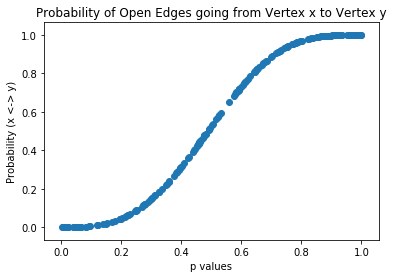

In [19]:
plt.scatter(p_values,probability_values)
plt.title("Probability of Open Edges going from Vertex x to Vertex y")
plt.ylabel("Probability (x <-> y)")
plt.xlabel("p values")
plt.show()